In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

experiment 1


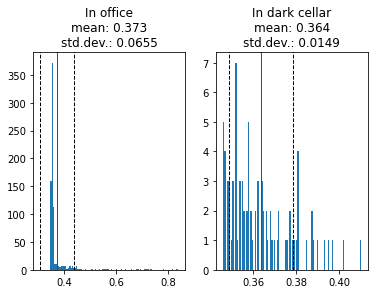

experiment 2


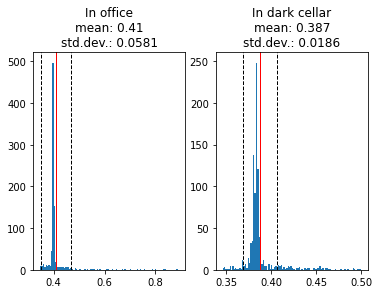

experiment 3


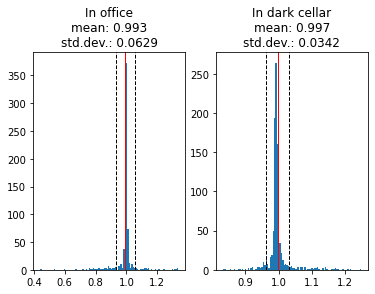

experiment 4


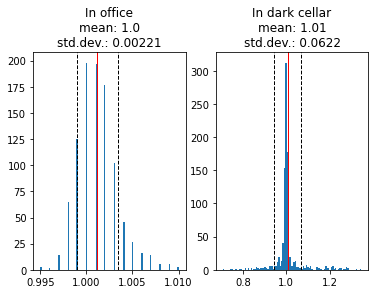

experiment 5


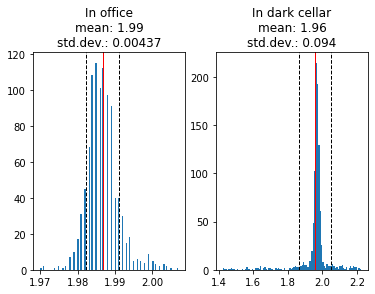

experiment 6


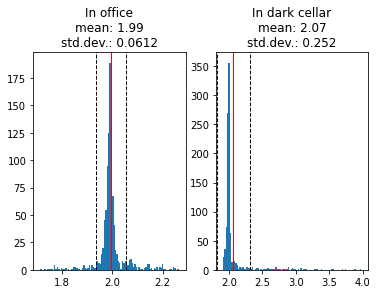

experiment 7


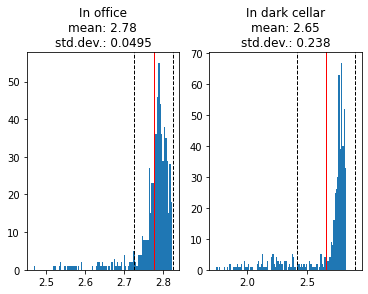

experiment 8


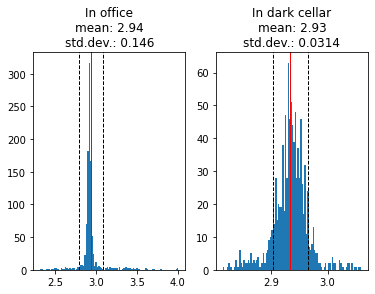

In [33]:

experiments = ["1: 35cm", "2: 40cm", "3:100"]

for i in range(1,9):
    office = 'logs/office/exp'+str(i)+'_788.log'
    office_invalid_count = 0
    office_valid_count = 0
    office_tof_measurements_raw = []

    cellar_dark = 'logs/cellar/exp'+str(i)+'_788_dark.log'
    cellar_dark_invalid_count = 0
    cellar_dark_valid_count = 0
    cellar_dark_tof_measurements_raw = []

    cellar_light = 'logs/cellar/exp'+str(i)+'_788_light.log'
    cellar_light_invalid_count = 0
    cellar_light_valid_count = 0
    cellar_light_tof_measurements_raw = []

    with open(office) as f:
        for line in f:
            if float(line) == 0 or float(line) == -1:
                office_invalid_count += 1
                continue
            if not line[0] == '#':
                office_tof_measurements_raw.append(float(line))
                office_valid_count += 1
    office_tof_data = np.array(office_tof_measurements_raw)

    with open(cellar_dark) as f:
        for line in f:
            if float(line) == 0 or float(line) == -1:
                cellar_dark_invalid_count += 1
                continue
            if not line[0] == '#':
                cellar_dark_tof_measurements_raw.append(float(line))
                cellar_dark_valid_count += 1
    cellar_dark_tof_data = np.array(cellar_dark_tof_measurements_raw)

    fig, axs = plt.subplots(nrows=1, ncols=2)
    print(f"experiment {i}")

    office_mean = office_tof_data.mean()
    office_std_dev = office_tof_data.std()
    plt.sca(axs[0])
    plt.title(f"In office\nmean: {office_mean:.3}\nstd.dev.: {office_std_dev:.3}")
    plt.hist(office_tof_data, bins=100, linewidth=1)
    plt.axvline(office_mean, color='r', linewidth=1)
    plt.axvline(office_mean+office_std_dev, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(office_mean-office_std_dev, color='k', linestyle='dashed', linewidth=1)

    plt.sca(axs[1])
    cellar_dark_mean = cellar_dark_tof_data.mean()
    cellar_dark_std_dev = cellar_dark_tof_data.std()
    plt.title(f"In dark cellar\nmean: {cellar_dark_mean:.3}\nstd.dev.: {cellar_dark_std_dev:.3}")
    plt.hist(cellar_dark_tof_data, bins=100, linewidth=1)
    plt.axvline(cellar_dark_mean, color='r', linewidth=1)
    plt.axvline(cellar_dark_mean+cellar_dark_std_dev, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(cellar_dark_mean-cellar_dark_std_dev, color='k', linestyle='dashed', linewidth=1)

    plt.show()

# with open(cellar_light) as f:
#     for line in f:
#         if float(line) == 0 or float(line) == -1:
#             cellar_light_invalid_count += 1
#             continue
#         if not line[0] == '#':
#             cellar_light_tof_measurements_raw.append(float(line))
#             cellar_light_valid_count += 1
# cellar_light_tof_data = np.array(cellar_light_tof_measurements_raw)